# 1    Python
## 1.

В отличие от list, tuple является неизменяемой структурой. В list наиболее важен порядок элементов, тогда как tuple - структура. Поэтому list и tuple могут быть добавлены в set, но использован как ключ в dict может только tuple .

In [3]:
basket_t = ('apple', 'orange', 'apple', 'pear', 'orange', 'banana')
basket_l = ['apple', 'orange', 'apple', 'pear', 'orange', 'banana']

In [4]:
print type(basket_t), type(basket_l)

<type 'tuple'> <type 'list'>


In [5]:
set_l = set(basket_l)
set_t = set(basket_t)
print set_l,set_t

set(['orange', 'pear', 'apple', 'banana']) set(['orange', 'pear', 'apple', 'banana'])


Структура dict организована как hashtable(с поддержкой совпадения ключей).

В python2 range() создает лист, тогда так xrange() создает объект:

In [6]:
print type(range(100)), type(xrange(100))

<type 'list'> <type 'xrange'>


Также, xrange()  не хранит элементы в памяти:

In [7]:
foo = range(10**10)

MemoryError: 

In [ ]:
foo_kosher = xrange(10**10)

что позволяет не крашится на большом количестве элементов.

List comprehension - краткий и наглядный способ создавать списки. Нпр [x**100500 for x in array if x%2 != 0] вернет массив нечетных элементов из array, возведенных в степень.

    Функции map и reduce работают как и в других нормальных языках: map поэлементно применяет к коллекции f(x), reduce попарно f(x,y): 

$$result = f(...(f(x_1,x_2),x_3)...,x_n)$$

In [8]:
print map(lambda x:x**2, range(100))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


In [9]:
print reduce(lambda x, y:x + y, range(100)), (100*99)/2

4950 4950


## 2.

In [10]:
import sys
def fib(N):
    return fib(N-2) + fib(N-1) if (N > 2)  else 1


In [11]:
fib(30)

832040

Для N = 40 время работы заметно возрастает

In [12]:
#sys.setrecursionlimit(5)
#fib(30) #тут ноутбук умирает

In [19]:
#тру- формула
def true_fib(N):
    def f():
        return (1+5**0.5)/2
    return int((f()**N - (-f())**(-N))/(2.0*f() - 1))

In [23]:
print true_fib(30)

832040


## 3.

In [106]:
import time                                                
 
def timer(f):
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print "Время выполнения функции %s: %f" % (str(f), (time.time()-t))
        return res

    return tmp

In [107]:
@timer
def fib(N):
    return fib(N-2) + fib(N-1) if (N > 2)  else 1

@timer
def true_fib(N):
    def f():
        return (1+5**0.5)/2
    return int((f()**N - (-f())**(-N))/(2.0*f() - 1))

In [108]:
true_fib(1000)

Время выполнения функции <function true_fib at 0x7f753d6b7f50>: 0.000021


43466557686938914862637500386755014010958388901725051132915256476112292920052539720295234060457458057800732025086130975998716977051839168242483814062805283311821051327273518050882075662659534523370463746326528L

In [ ]:
fib(10)

## 4. , 5.

In [53]:
%%writefile my_doctest.py
#%%testmod
"""
This is the "example" module.

The example module supplies one function, marg().  For example,

>>> factorial(1,2)
120
"""
def marg(re, img):
    """ Returns tuple, containing module and
    argument for given complex number.
    
    >>> [marg(n, n+ 3.14/n) for n in range(1,10)]
    [(4.123105625617661, 1.3258176636680326), (4.031128874149275, 1.0516502125483738)]
    
    """
    import math
    return (re**2 + img**2)**0.5, math.atan(img/re)

if __name__ == "__main__":
    import doctest
    #print doctest.__file__
    doctest.testmod()


Overwriting my_doctest.py


In [ ]:
!python my_doctest.py -v

In [46]:
print marg(1.,1.), type(marg(1., 1.))
print [marg(n, n + 3./n) for n in range(1,3)]

(1.4142135623730951, 0.7853981633974483) <type 'tuple'>
[(4.123105625617661, 1.3258176636680326), (4.031128874149275, 1.0516502125483738)]


## 6.

In [77]:
import math
class Complex:
    def __init__(self, re, im):
        self.re = re
        self.im = im
    def modulus(self):
        return (self.re**2 + self.im**2)**0.5
    def argument(self):
        return math.atan(self.im/self.re) if self.re != 0 else 'not def'

In [80]:
c = Complex(0,2)
print c.re, c.im, c.argument(), c.modulus()

0 2 not def 2.0


In [81]:
c = Complex(1,1)
print c.re, c.im, c.argument(), c.modulus()

1 1 0.785398163397 1.41421356237


 # 2 Requests/urllib + BeautifulSoup

тут был бы копипаст из ноутбука с семинара

# 3 Numpy

In [82]:
import numpy as np

## 1.

In [83]:
narr = np.ndarray(shape=(3,4,2), dtype=float, order='F')

In [84]:
narr

array([[[  6.92392115e-310,   6.92392188e-310],
        [  6.92391054e-310,   6.92391053e-310],
        [  6.92392192e-310,   6.92392192e-310],
        [  6.92391053e-310,   6.92391053e-310]],

       [[  1.30897910e-316,   6.92391053e-310],
        [  6.92392188e-310,   6.92392188e-310],
        [  6.92391054e-310,   6.92391054e-310],
        [  6.92392192e-310,   6.92392192e-310]],

       [[  6.92392192e-310,   6.92392192e-310],
        [  6.92391053e-310,   6.92391053e-310],
        [  6.92392188e-310,   6.92392188e-310],
        [  6.92391891e-310,   6.92391888e-310]]])

In [94]:
print narr[0], "\n######\n",narr[0][2] , "\n######\n",narr[0][:2], "\n######\n"

[[  6.92392115e-310   6.92392188e-310]
 [  6.92391054e-310   6.92391053e-310]
 [  6.92392192e-310   6.92392192e-310]
 [  6.92391053e-310   6.92391053e-310]] 
######
[  6.92392192e-310   6.92392192e-310] 
######
[[  6.92392115e-310   6.92392188e-310]
 [  6.92391054e-310   6.92391053e-310]] 
######



In [100]:
narr[narr.sum(-1) >= 1.12392115e-309, :]

array([[  6.92392115e-310,   6.92392188e-310],
       [  6.92391054e-310,   6.92391053e-310],
       [  6.92392192e-310,   6.92392192e-310],
       [  6.92391053e-310,   6.92391053e-310],
       [  6.92392188e-310,   6.92392188e-310],
       [  6.92391054e-310,   6.92391054e-310],
       [  6.92392192e-310,   6.92392192e-310],
       [  6.92392192e-310,   6.92392192e-310],
       [  6.92391053e-310,   6.92391053e-310],
       [  6.92392188e-310,   6.92392188e-310],
       [  6.92391891e-310,   6.92391888e-310]])

## 2.

In [23]:
import time
import math

arr = [math.cos(x) for x in range(10**7)]

narr = np.array(arr)

In [24]:
 def timer(f):
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print "Время выполнения функции %s: %f" % (str(f), (time.time()-t))
        return res

    return tmp

@timer
def timeit(arr):
    return arr.sort()

In [131]:
timeit(arr)

Время выполнения функции <function timeit at 0x7f7546f50e60>: 10.120733


In [132]:
timeit(narr)

Время выполнения функции <function timeit at 0x7f7546f50e60>: 1.113189


## 3.

In [32]:
import numpy as np

In [3]:
l = np.linspace(2,3,num=10)

In [5]:
print l,'\n', type(l)

[ 2.          2.11111111  2.22222222  2.33333333  2.44444444  2.55555556
  2.66666667  2.77777778  2.88888889  3.        ] 
<type 'numpy.ndarray'>


In [25]:
@timer
def my_linespace(start, end, num_partitions):
    step = 1.0*(end - start)/num_partitions
    
    return [start+ step*x for x in range(0, num_partitions)]

In [26]:
my_l = my_linespace(2,3,10)

Время выполнения функции <function my_linespace at 0x7f1cd1f0b9b0>: 0.000023


In [27]:
print my_l,'\n', type(my_l)

[2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9] 
<type 'list'>


In [33]:
@timer
def wrap_linespace(start,end,partitions):
    l = np.linspace(start,end,num=partitions)
    return l

In [36]:
my_l = my_linespace(2,3,10*9)
np_l = wrap_linespace(2,3,10*9)

Время выполнения функции <function my_linespace at 0x7f1cd1f0b9b0>: 0.000029
Время выполнения функции <function wrap_linespace at 0x7f1cd1efaed8>: 0.000057


linespace из numpy  примерно в 2 раза быстрее

# 4 Matplotlib

## 1.

 %matplotlib inline - графики будут отображаться в блокноте

## 2. 3.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

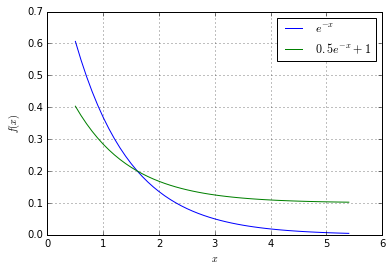

In [58]:
x = np.arange(0.5, 5.5, 0.1)
y = np.exp(-x)
fig = plt.figure()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.plot(x,y,x,0.1+y/2.0)
plt.legend(['$e^{-x}$', '$0.5e^{-x} + 1$'])
plt.savefig('foo.png')
plt.show()

## 4.

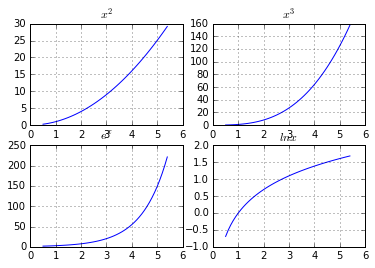

In [65]:
x = np.arange(0.5, 5.5, 0.1)
y1 = x**2
y2 = x**3
y3 = np.exp(x)
y4 = np.log(x)
plt.figure(1)

plt.subplot(221)
plt.plot(x, y1)
plt.title('$x^2$')
plt.grid(True)

plt.subplot(222)
plt.plot(x, y2)
plt.title('$x^3$')
plt.grid(True)

plt.subplot(223)
plt.plot(x, y3)
plt.title('$e^x$')
plt.grid(True)

plt.subplot(224)
plt.plot(x, y4)
plt.title('$lnx$')
plt.grid(True)

plt.show()

## 5.

In [9]:
import numpy as np
def f(x,y):
    return 3*x*y + x - 2*y

In [10]:
x = np.arange(0.0, 5, 0.1)
y = np.arange(0.0, 5, 0.1)


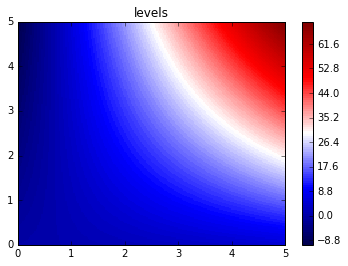

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


dx, dy = 0.025, 0.025

y, x = np.mgrid[slice(0, 5 + dy, dy),
                slice(0, 5 + dx, dx)]

z = 3*x*y + x - 2*y

z = z[:-1, :-1]
levels = MaxNLocator(nbins=100).tick_values(z.min(), z.max())

cmap = plt.get_cmap('seismic')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0) = plt.subplots(nrows=1)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('levels')

plt.show()

## 6.

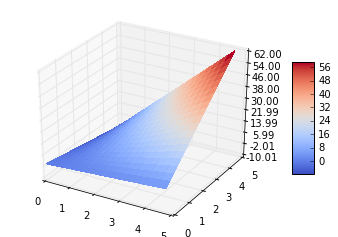

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(0, 5, 0.25)
y = np.arange(0, 5, 0.25)
x, y = np.meshgrid(x, y)
z = 3*x*y + x - 2*y
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-10.01, 62)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 5 Всё вместе + SciPy

In [147]:
from scipy.optimize import minimize
from scipy.optimize import curve_fit
x = np.arange(-2.5,1,0.01)
y = (x**3 + 2*x**2 -3*x + 2) + 0.1*np.random.randn(len(x))
def f(x,a,b,c,d):
    return a*x**3 + b*x**2 -c*x + d
points = np.arange(-2.2,1,0.5)
minimiz = [minimize(lambda x :(x**3 + 2*x**2 -3*x + 2),p,method='BFGS').x for p in points]
maximize = [minimize(lambda x :-(x**3 + 2*x**2 -3*x + 2),p,method='BFGS').x for p in points]
print minimiz,'\n'
print maximize

[array([-2787.4800293]), array([ 0.53518373]), array([ 0.53518375]), array([ 0.53518371]), array([ 0.53518462]), array([ 0.53518369]), array([ 0.53518375])] 

[array([-1.86851709]), array([-1.86851708]), array([-1.86851738]), array([-1.86851709]), array([-1.86851711]), array([-1.86851711]), array([ 2171.68006592])]


In [148]:
mini = 0.53518375
maxi = -1.86851738

In [149]:
popt, pcov = curve_fit(f, x, y)
c = popt
print c

y_fitted = f(x,c[0],c[1],c[2],c[3])

[ 1.00158088  2.00220363  3.00618599  1.99054704]


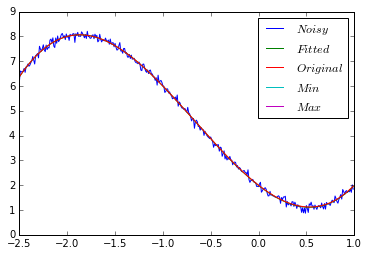

In [151]:
fc = lambda x :(x**3 + 2*x**2 -3*x + 2)
plt.plot(x, y,x,f(x,c[0],c[1],c[2],c[3]),x, x**3 + 2*x**2 -3*x + 2,mini,fc(mini),maxi,fc(maxi))
plt.legend(['$Noisy$', '$Fitted$', '$Original$','$Min$','$Max$'])
plt.show()